# Multilayer Perceptron para a previsão de dados de precipitação

## Importação dos dados

In [18]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob

In [7]:
df = pd.read_csv("Banco de dados/inmet_filtrado_mirante.csv", index_col=0)
df = df.dropna()

## Limpeza dos dados

### Normalização dos dados

A fórmula é: $x_{norm} = \dfrac{x_{i} - \overline{x}}{\sigma}$

In [8]:
df.mean()

PRECIPITACAO TOTAL, HORARIO(mm)                     0.181972
TEMPERATURA DO PONTO DE ORVALHO(°C)                14.126436
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C)    14.627583
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C)    13.652489
UMIDADE REL. MAX. NA HORA ANT. (AUT)(%)            71.875480
UMIDADE RELATIVA DO AR, HORARIA(%)                 69.346008
VENTO, RAJADA MAXIMA(m/s)                           5.225672
dtype: float64

In [9]:
df_norm = (df - df.mean())/df.std()
df_norm["PRECIPITACAO TOTAL, HORARIO(mm)"] = df["PRECIPITACAO TOTAL, HORARIO(mm)"]

In [10]:
df_norm.head(2)

,"PRECIPITACAO TOTAL, HORARIO(mm)",TEMPERATURA DO PONTO DE ORVALHO(°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, RAJADA MAXIMA(m/s)"
Data,,,,,,,
2010-10-10 00:00:00,0.0,-0.711163,-0.867264,-0.673133,0.902522,0.995876,0.757262
2010-10-10 01:00:00,0.0,-0.738240,-0.839535,-0.620390,0.902522,0.826644,0.373708


### Simplificação e separação dos dados

In [11]:
filtrar_ = lambda value: int(value > 0)

In [12]:
features = df_norm.columns[1:]

In [13]:
X = df_norm[features]
Y = df_norm['PRECIPITACAO TOTAL, HORARIO(mm)']
Y = Y.apply(filtrar_)

## Separação dos dados

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Criação do modelo

In [15]:
model = Sequential([
    Input(shape=(len(features),)), # Camada de Input
    Dense(12, activation="sigmoid", input_shape=(len(features),)), # Camada oculta
    Dense(1, activation="sigmoid") # Camada de Output
])
model.summary()

/home/vortex/Documents/Fatec/Trabalhos/3º Ciclo/Cálculo/2R2N/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-29 23:08:35.511763: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Treino e resultados

In [ ]:
if not glob.glob("mlp.keras"):
    mod = model.fit(x_train, y_train, epochs=100, batch_size=20, validation_data=(x_test, y_test), callbacks=[early_stopping])
    model.save("mlp.keras")
else:
    model = load_model("mlp.keras")
    print("Modelo já treinado!")  

Epoch 1/100
5129/5129 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9320 - loss: 0.1746 - val_accuracy: 0.9298 - val_loss: 0.1738
Epoch 2/100
5129/5129 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9326 - loss: 0.1746 - val_accuracy: 0.9296 - val_loss: 0.1733
Epoch 3/100
5129/5129 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.9350 - loss: 0.1687 - val_accuracy: 0.9300 - val_loss: 0.1726
Epoch 4/100
5129/5129 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9330 - loss: 0.1717 - val_accuracy: 0.9300 - val_loss: 0.1727
Epoch 5/100
5129/5129 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.9325 - loss: 0.1720 - val_accuracy: 0.9304 - val_loss: 0.1714
Epoch 6/100
5129/5129 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9326 - loss: 0.1730 - val_accuracy: 0.9305 - val_loss: 0.1712
Epoch 7/100
5129/5129 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9328 - loss: 0.1716 - val_accuracy: 0.9311 - val_loss: 0.1712
Epoch 8/100
5129/5129 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9342 -

## Teste do modelo

In [152]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Loss, Acurácia:', results)

Loss, Acurácia: [0.16007976233959198, 0.934638500213623]


### Visualização dos dados

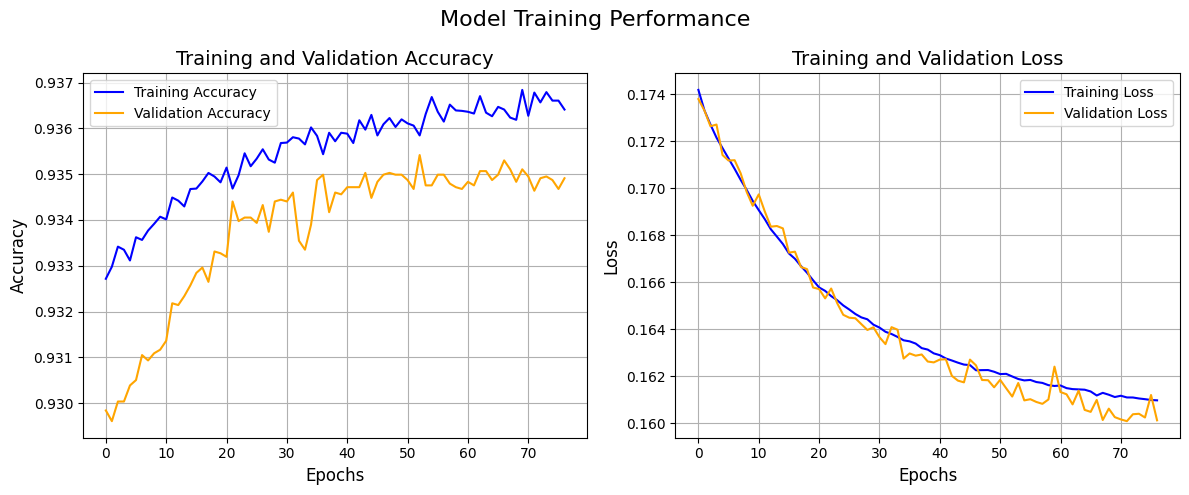

In [153]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mod.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(mod.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(mod.history['loss'], label='Training Loss', color='blue')
plt.plot(mod.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

## Weight e Bias

### Camada oculta 1

In [27]:
weights, biases = model.layers[0].get_weights()

Note que está transposto!

In [29]:
weights.shape

(6, 12)

1 bias por neurônio

In [24]:
biases.shape

(12,)

### Camada 2 (Output)

In [33]:
weights, biases = model.layers[1].get_weights()

In [34]:
weights.shape

(12, 1)

In [35]:
biases.shape

(1,)

### Diagrama dos neurônios e conexões

In [37]:
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

/home/vortex/Documents/Fatec/Trabalhos/3º Ciclo/Cálculo/2R2N/.venv/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/home/vortex/Documents/Fatec/Trabalhos/3º Ciclo/Cálculo/2R2N/.venv/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/home/vortex/Documents/Fatec/Trabalhos/3º Ciclo/Cálculo/2R2N/.venv/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated an